In [1]:
import faulthandler; faulthandler.enable()

import pickle
import make_allen_tests_from_id# import *

from make_allen_tests_from_id import *
from neuronunit.optimisation.optimization_management import dtc_to_rheo, inject_and_plot_model30,check_bin_vm30,check_bin_vm15


import efel
import pandas as pd
import seaborn as sns
list(efel.getFeatureNames());
from utils import dask_map_function

import bluepyopt as bpop
import bluepyopt.ephys as ephys
import pickle
from sciunit.scores import ZScore, RatioScore
from sciunit import TestSuite
from sciunit.scores.collections import ScoreArray
import sciunit
import numpy as np
from neuronunit.optimisation.optimization_management import dtc_to_rheo, switch_logic,active_values
from neuronunit.tests.base import AMPL, DELAY, DURATION

import quantities as pq
PASSIVE_DURATION = 500.0*pq.ms
PASSIVE_DELAY = 200.0*pq.ms
import matplotlib.pyplot as plt
from bluepyopt.ephys.models import ReducedCellModel
import numpy
from neuronunit.optimisation.optimization_management import test_all_objective_test
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol,inject_and_plot_passive_model
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import copy

import numpy as np
from make_allen_tests import AllenTest

from sciunit.scores import ZScore
from collections.abc import Iterable

from bluepyopt.parameters import Parameter
from utils import dask_map_function


tests = pickle.load(open('allen_NU_tests.p','rb'))
names = [t.name for t in tests[3].tests ]
names;


simple_yes_list = ['mean_AP_amplitude','mean_frequenc','min_AHP_values','min_voltage_between_spikes','minimum_voltage ','all_ISI_values','ISI_log_slope','mean_frequency','adaptation_index2','first_isi','ISI_CV','median_isi','AHP_depth_abs','sag_ratio2','ohmic_input_resistance','sag_ratio2','peak_voltage','voltage_base','Spikecount','ohmic_input_resistance_vb_ssse']

#simple_yes_list = ['mean_frequency','ISI_log_slope','adaptation_index2','AHP_depth_abs','sag_ratio2','ohmic_input_resistance','sag_ratio2','peak_voltage','voltage_base','Spikecount','ohmic_input_resistance_vb_ssse']


names = [t.observation for t in tests[3].tests if "Spike" in t.name]
names
specimen_id = tests[3].name

# initialize the cacher
try:
    with open(str(specimen_id)+'later_allen_NU_tests.p','rb') as f:
        suite = pickle.load(f) 

except:
    specimen_id = tests[3].name
    sweep_numbers,data_set,sweeps = make_allen_tests_from_id.allen_id_to_sweeps(specimen_id)
    vm15,vm30,rheobase,currents,vmrh = make_allen_tests_from_id.get_model_parts(data_set,sweep_numbers,specimen_id,simple_yes_list)
    suite,specimen_id = make_allen_tests_from_id.make_suite_from_static_models(vm15,vm30,rheobase,currents,vmrh,specimen_id,simple_yes_list)
    with open(str(specimen_id)+'later_allen_NU_tests.p','wb') as f:
        pickle.dump(suite,f) 
        





       
        
specific_filter_list = ['mean_AP_amplitude_1.5x','mean_frequency_1.5x','min_AHP_indices_1.5x','min_AHP_values_1.5x','min_voltage_between_spikes_1.5x','minimum_voltage_1.5x ','ISI_log_slope_1.5x','mean_frequency_1.5x','adaptation_index2_1.5x','first_isi_1.5x','ISI_CV_1.5x','median_isi_1.5x','AHP_depth_abs_1.5x','sag_ratio2_1.5x','ohmic_input_resistance_1.5x','sag_ratio2_1.5x','peak_voltage_1.5x','voltage_base_1.5x','Spikecount_1.5x']#,'Spikecount_3.0x']

        
target = StaticModel(vm=suite.traces['vmrh']) #DataTC(backend="ADEXP")
target.vm30 = suite.traces['vm30'] 
target.vm15 = suite.traces['vm15'] 



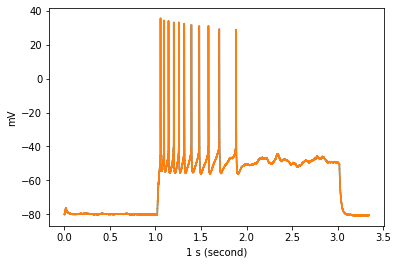

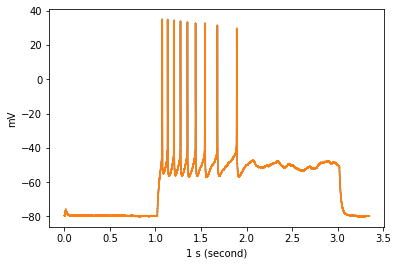

In [2]:
check_bin_vm30(target,target)

check_bin_vm15(target,target)



In [21]:
nu_tests = suite.tests;
for t in nu_tests:
    print(t.name)

AHP1_depth_from_peak_1.5x
AHP2_depth_from_peak_1.5x
AHP_depth_1.5x
AHP_depth_abs_1.5x
AHP_depth_abs_slow_1.5x
AHP_depth_diff_1.5x
AHP_depth_from_peak_1.5x
AHP_slow_time_1.5x
AHP_time_from_peak_1.5x
AP1_amp_1.5x
AP1_begin_voltage_1.5x
AP1_begin_width_1.5x
AP1_peak_1.5x
AP1_width_1.5x
AP2_AP1_begin_width_diff_1.5x
AP2_AP1_diff_1.5x
AP2_AP1_peak_diff_1.5x
AP2_amp_1.5x
AP2_begin_voltage_1.5x
AP2_begin_width_1.5x
AP2_peak_1.5x
AP2_width_1.5x
AP_amplitude_1.5x
AP_amplitude_change_1.5x
AP_amplitude_diff_1.5x
AP_amplitude_from_voltagebase_1.5x
AP_begin_indices_1.5x
AP_begin_time_1.5x
AP_begin_voltage_1.5x
AP_begin_width_1.5x
AP_duration_1.5x
AP_duration_change_1.5x
AP_duration_half_width_1.5x
AP_duration_half_width_change_1.5x
AP_end_indices_1.5x
AP_fall_indices_1.5x
AP_fall_rate_1.5x
AP_fall_rate_change_1.5x
AP_fall_time_1.5x
AP_height_1.5x
AP_rise_indices_1.5x
AP_rise_rate_1.5x
AP_rise_rate_change_1.5x
AP_rise_time_1.5x
AP_width_1.5x
APlast_amp_1.5x
APlast_width_1.5x
ISI_CV_1.5x
ISI_log_slop

In [3]:

nu_tests = suite.tests;


attrs = {k:np.mean(v) for k,v in MODEL_PARAMS["ADEXP"].items()}
dtc = DataTC(backend="ADEXP",attrs=attrs)
for t in nu_tests:
    if t.name == 'Spikecount_1.5x':
        spk_count = float(t.observation['mean'])
        print(spk_count,'spike_count')
        break
observation_range={}
observation_range['value'] = spk_count
scs = SpikeCountSearch(observation_range)
model = dtc.dtc_to_model()
target_current = scs.generate_prediction(model)

ALLEN_DELAY = 1000.0*qt.s
ALLEN_DURATION = 2000.0*qt.s


uc = {'amplitude':target_current['value'],'duration':ALLEN_DURATION,'delay':ALLEN_DELAY}
model = dtc.dtc_to_model()

model.inject_square_current(uc)
print(model.get_spike_count(),'spikes')


tg = target_current['value']
MODEL_PARAMS["ADEXP"]#["current_inj"] = [tg-0.25*tg,tg+0.25*tg]

simple_cell = ephys.models.ReducedCellModel(
        name='simple_cell',
        params=MODEL_PARAMS["ADEXP"],backend="ADEXP")  
simple_cell.backend = "ADEXP"
simple_cell.allen = None
simple_cell.allen = True


model = simple_cell
model.params = {k:np.mean(v) for k,v in model.params.items() }

features = None
allen = True


yes_list = specific_filter_list 
class NUFeatureAllenMultiSpike(object):
    def __init__(self,test,model,cnt,target,check_list,spike_obs,print_stuff=False):
        self.test = test
        self.model = model
        self.check_list = check_list
        self.spike_obs = spike_obs
        self.cnt = cnt
        self.target = target
        self.print_stuff = print_stuff
    def calculate_score(self,responses):
        
        if not 'features' in responses.keys():# or not 'model' in responses.keys():
            return 1000.0
        features = responses['features']
        if type(features) is type(None):
            return 1000.0

        check_list = self.check_list
    
        self.test.score_type = RatioScore


        feature_name = self.test.name
        delta1 = np.abs(features['Spikecount_1.5x']-np.mean(self.spike_obs[0]['mean']))
        if feature_name not in features.keys():
            return 1000.0+(delta1)
        
        if features[feature_name] is None:
            return 1000.0+(delta1)
            
        if type(features[self.test.name]) is type(Iterable):
            features[self.test.name] = np.mean(features[self.test.name])
        self.test.observation['std'] = np.abs(np.mean(self.test.observation['mean']))
        self.test.observation['mean'] = np.mean(self.test.observation['mean'])   
        self.test.set_prediction(np.mean(features[self.test.name]))

        #if 'Spikecount_3.0x'==feature_name or 
        if 'Spikecount_1.5x'==feature_name:
            delta = np.abs(features[self.test.name]-np.mean(self.test.observation['mean']))
            if np.nan==delta or delta==np.inf:
                delta = 1000.0

            
            return delta
        else:


            if feature_name in check_list:
                if features[feature_name] is None:
                    print('gets here')
                    return 1000.0+(delta1)
                self.test.score_type = ZScore
                score_gene = self.test.feature_judge()
                if score_gene is not None:
                    if score_gene.log_norm_score is not None:
                        delta = np.abs(float(score_gene.log_norm_score))
                    else:
                        if score_gene.raw is not None:
                            delta = np.abs(float(score_gene.raw))
                        else:
                            delta = None

                else:
                    delta = None

                if delta is None:
                    delta = np.abs(features[self.test.name]-np.mean(self.test.observation['mean']))


                if np.nan==delta or delta==np.inf:
                    delta = np.abs(features[self.test.name]-np.mean(self.test.observation['mean']))
                if np.nan==delta or delta==np.inf:
                    delta = 1000.0
                return delta#+delta2
            else:
                return 0.0
   
objectives = []
spike_obs = []
for tt in nu_tests:
    if 'Spikecount_1.5x' == tt.name:
        spike_obs.append(tt.observation)
spike_obs = sorted(spike_obs, key=lambda k: k['mean'],reverse=True)

#check_list["RheobaseTest"] = target.rheobase['value']
for cnt,tt in enumerate(nu_tests):
    feature_name = '%s' % (tt.name)
    if feature_name in specific_filter_list:
        #if 'Spikecount_3.0x' == tt.name or 
        if 'Spikecount_1.5x' == tt.name:
            ft = NUFeatureAllenMultiSpike(tt,model,cnt,yes_list,yes_list,spike_obs)
            objective = ephys.objectives.SingletonObjective(
                feature_name,
                ft)
            objectives.append(objective)

       
score_calc = ephys.objectivescalculators.ObjectivesCalculator(objectives) 
      
lop={}

for k,v in MODEL_PARAMS["ADEXP"].items():
    p = Parameter(name=k,bounds=v,frozen=False)
    lop[k] = p

simple_cell.params = lop





sweep_protocols = []
for protocol_name, amplitude in [('step1', 0.05)]:

    protocol = ephys.protocols.SweepProtocol(protocol_name, [None], [None])
    sweep_protocols.append(protocol)
twostep_protocol = ephys.protocols.SequenceProtocol('twostep', protocols=sweep_protocols)

simple_cell.params_by_names(MODEL_PARAMS["ADEXP"].keys())
simple_cell.params;

MODEL_PARAMS["ADEXP"]
cell_evaluator = ephys.evaluators.CellEvaluator(
        cell_model=simple_cell,
        param_names=MODEL_PARAMS["ADEXP"].keys(),
        fitness_protocols={twostep_protocol.name: twostep_protocol},
        fitness_calculator=score_calc,
        sim='euler')

simple_cell.params_by_names(MODEL_PARAMS["ADEXP"].keys())
simple_cell.params;
simple_cell.seeded_current = target_current['value']
simple_cell.spk_count = spk_count



no_list = pickle.load(open("too_rippled_b.p","rb"))


objectives2 = []
for cnt,tt in enumerate(nu_tests):
    feature_name = '%s' % (tt.name)
    if (feature_name not in no_list) and (feature_name in specific_filter_list):
        if feature_name != "time_constant_1.5x" and feature_name != "RheobaseTest":
            ft = NUFeatureAllenMultiSpike(tt,model,cnt,yes_list,yes_list,spike_obs,print_stuff=True)
            objective = ephys.objectives.SingletonObjective(
                feature_name,
                ft)
            objectives2.append(objective)
objectives2
score_calc2 = ephys.objectivescalculators.ObjectivesCalculator(objectives2) 
objectives2



MODEL_PARAMS["ADEXP"]
cell_evaluator2 = ephys.evaluators.CellEvaluator(
        cell_model=simple_cell,
        param_names=list(MODEL_PARAMS["ADEXP"].keys()),
        fitness_protocols={twostep_protocol.name: twostep_protocol},
        fitness_calculator=score_calc2,
        sim='euler')
simple_cell.params_by_names(MODEL_PARAMS["ADEXP"].keys())

simple_cell.params;


MODEL_PARAMS["ADEXP"]
cell_evaluator2 = ephys.evaluators.CellEvaluator(
        cell_model=simple_cell,
        param_names=list(MODEL_PARAMS["ADEXP"].keys()),
        fitness_protocols={twostep_protocol.name: twostep_protocol},
        fitness_calculator=score_calc2,
        sim='euler')

MU = 15

optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator2,
        offspring_size = MU,
        map_function = map,
        selector_name='IBEA',mutpb=0.1,cxpb=0.35)
final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=100)
cp = {}
cp['final_pop'] = final_pop
cp['hall_of_fame'] = hall_of_fame

9.0 spike_count
9 spikes
sampled nan
sampled nan
sampled nan
sampled nan


INFO:__main__:gen	nevals	avg        	std       	min    	max        
1  	15    	5.38049e+13	2.0132e+14	7.83766	8.07074e+14
gen	nevals	avg        	std       	min    	max        
1  	15    	5.38049e+13	2.0132e+14	7.83766	8.07074e+14


sampled nan
sampled nan


INFO:__main__:2  	5     	2.60346e+13	1.42598e+14	7.83766	8.07074e+14
2  	5     	2.60346e+13	1.42598e+14	7.83766	8.07074e+14
INFO:__main__:3  	6     	3328.52    	4872.33    	7.74576	15697.4    
3  	6     	3328.52    	4872.33    	7.74576	15697.4    
INFO:__main__:4  	8     	429.894    	1616.13    	7.74576	9090       
4  	8     	429.894    	1616.13    	7.74576	9090       
INFO:__main__:5  	7     	7.81653    	0.207587   	7.74576	8.87645    
5  	7     	7.81653    	0.207587   	7.74576	8.87645    
INFO:__main__:6  	10    	8.01968    	0.390755   	7.71697	8.87645    
6  	10    	8.01968    	0.390755   	7.71697	8.87645    
INFO:__main__:7  	9     	300.828    	1604.68    	7.71697	9090       
7  	9     	300.828    	1604.68    	7.71697	9090       
INFO:__main__:8  	10    	590.797    	1786.02    	7.71697	9090       
8  	10    	590.797    	1786.02    	7.71697	9090       
INFO:__main__:9  	11    	10.25      	8.61968    	7.71697	44.2979    
9  	11    	10.25      	8.61968    	7.71697	44.2979    
INFO:__m

sampled nan
sampled nan


INFO:__main__:38 	12    	782.737    	1873.03    	3.32745	9090       
38 	12    	782.737    	1873.03    	3.32745	9090       


sampled nan
sampled nan


INFO:__main__:39 	7     	298.46     	1605.11    	3.32745	9090       
39 	7     	298.46     	1605.11    	3.32745	9090       
INFO:__main__:40 	3     	4.28581    	1.92779    	3.32745	10.7089    
40 	3     	4.28581    	1.92779    	3.32745	10.7089    
INFO:__main__:41 	8     	6.1438     	2.74975    	3.32745	10.7089    
41 	8     	6.1438     	2.74975    	3.32745	10.7089    
INFO:__main__:42 	10    	7.37979    	3.46632    	3.32745	21.3617    
42 	10    	7.37979    	3.46632    	3.32745	21.3617    
INFO:__main__:43 	5     	201.098    	1069.48    	3.32745	6058.87    
43 	5     	201.098    	1069.48    	3.32745	6058.87    
INFO:__main__:44 	2     	594.424    	1788.63    	3.32745	6058.87    
44 	2     	594.424    	1788.63    	3.32745	6058.87    
INFO:__main__:45 	7     	1766.58    	2745.29    	3.32745	6058.87    
45 	7     	1766.58    	2745.29    	3.32745	6058.87    
INFO:__main__:46 	6     	3716.9     	2946.75    	3.32745	6058.87    
46 	6     	3716.9     	2946.75    	3.32745	6058.87    
INFO:__m

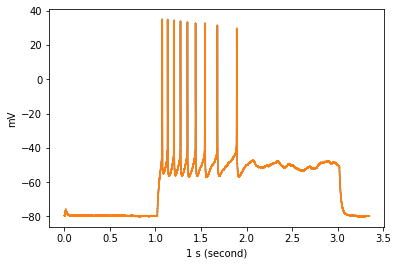

In [45]:
with open('allen_opt.p','rb') as f:
    [final_pop, hall_of_fame, logs, hist] = pickle.load(f)
    
    
best_ind = hall_of_fame[2]
best_ind_dict = cell_evaluator2.param_dict(best_ind)
model = cell_evaluator2.cell_model

model.attrs = {str(k):float(v) for k,v in cell_evaluator2.param_dict(best_ind).items()}
opt = model.model_to_dtc()
opt.attrs = {str(k):float(v) for k,v in cell_evaluator2.param_dict(best_ind).items()}
target = copy.copy(opt)
target.vm15 = suite.traces['vm15'] 
check_bin_vm15(target,target)


#target.vm30 = suite.traces['vm30']#.times 
#target.vm15 = target.vm15[0:int(len(vm)/2)]
#target.vm30 = target.vm15
#check_bin_vm15(target,target)
#vm = suite.traces['vm30']


In [46]:
#fitness = cell_evaluator2.param_dict(best_ind)
fitnesses = hall_of_fame[0].fitness.values
fitnesses
from sciunit.scores.collections import ScoreArray
tests = [i.features[0].test for i in objectives2]
scores_ = [j for j in fitnesses]
#ScoreArray([(j,) for i,j in zip(objectives2,fitnesses)])

SA = ScoreArray(tests, scores_)
SA.to_frame().T

,AHP_depth_abs_1.5x,ISI_CV_1.5x,ISI_log_slope_1.5x,Spikecount_1.5x,adaptation_index2_1.5x,mean_frequency_1.5x,ohmic_input_resistance_1.5x,peak_voltage_1.5x,sag_ratio2_1.5x,voltage_base_1.5x
0,0.178141,0.213176,0.16441,0.0,0.15745,0.23485,1.147874,0.069267,0.276667,0.143174


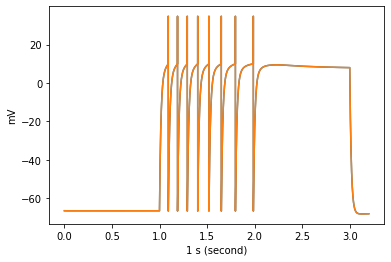

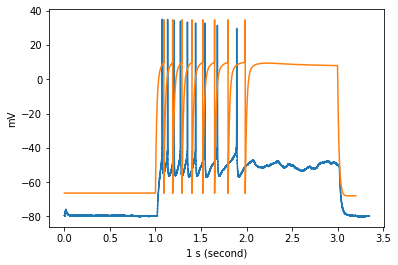

In [47]:

#opt.known_current = 10
#opt.spk_count = 11

#vm301,vm151,_,_,target = inject_and_plot_model30(target)

#check_bin_vm30(opt,opt)


#check_bin_vm30(target,target)
observation_range={}
observation_range['value'] = 11
scs = SpikeCountSearch(observation_range)
model = opt.dtc_to_model()
target_current = scs.generate_prediction(model)
opt.known_current = target_current
opt.spk_count = spk_count

vm152,_,_,opt = inject_and_plot_model30(opt,known_current=target_current)
check_bin_vm15(opt,opt)
check_bin_vm15(target,opt)







In [48]:
def basic_expVar(trace1, trace2):
    # https://github.com/AllenInstitute/GLIF_Teeter_et_al_2018/blob/master/query_biophys/query_biophys_expVar.py
    '''This is the fundamental calculation that is used in all different types of explained variation.  
    At a basic level, the explained variance is calculated between two traces.  These traces can be PSTH's
    or single spike trains that have been convolved with a kernel (in this case always a Gaussian)
    Input:
        trace 1 & 2:  1D numpy array containing values of the trace.  (This function requires numpy array
                        to ensure that this is not a multidemensional list.)
    Returns:
        expVar:  float value of explained variance
    '''
    
    var_trace1=np.var(trace1)
    var_trace2=np.var(trace2)
    var_trace1_minus_trace2=np.var(trace1-trace2)

    if var_trace1_minus_trace2 == 0.0:
        return 1.0
    else:
        return (var_trace1+var_trace2-var_trace1_minus_trace2)/(var_trace1+var_trace2)
#basic_expVar(target.vm15, opt.vm15)

ValueError: Inconsistent values of sampling_rate

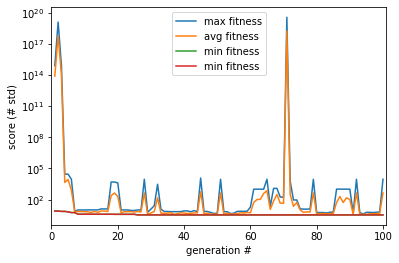

In [6]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1) 
plt.show()


In [7]:
with open('allen_opt.p','wb') as f:
    pickle.dump([final_pop, hall_of_fame, logs, hist],f)

